In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dat
from math import ceil

In [2]:
df = pd.read_csv('tech_team_train.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  int64  
 1   StockCode    200000 non-null  int64  
 2   Description  200000 non-null  int64  
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   UnitPrice    200000 non-null  float64
 6   CustomerID   200000 non-null  float64
 7   Country      200000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 12.2+ MB


In [4]:
df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,9952.735820,1573.893530,2024.197385,11.995500,3.454349,15287.588765,32.827520
std,5550.353986,843.903114,1090.339870,250.783212,90.082500,1715.369101,6.737939
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5066.000000,937.000000,1141.000000,2.000000,1.250000,13949.000000,35.000000
50%,10299.000000,1524.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14648.000000,2106.000000,2948.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,74215.000000,38970.000000,18287.000000,36.000000


In [5]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df.columns = ['InvoiceNo', 'StockCode', 'DescriptionId', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerId', 'Country']

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.CustomerId = df.CustomerId.astype(int)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      200000 non-null  int64         
 1   StockCode      200000 non-null  int64         
 2   DescriptionId  200000 non-null  int64         
 3   Quantity       200000 non-null  int64         
 4   InvoiceDate    200000 non-null  datetime64[ns]
 5   UnitPrice      200000 non-null  float64       
 6   CustomerId     200000 non-null  int32         
 7   Country        200000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5)
memory usage: 11.4 MB


In [8]:
df.StockCode.nunique(), df.DescriptionId.nunique()

(3544, 3731)

We have 3544 unique StockCodes and 3731 unique Descriptions which aligns with the fact that the retailer sells many different types of products.
Lets take a look at the most common stockcodes and descriptions being sold :

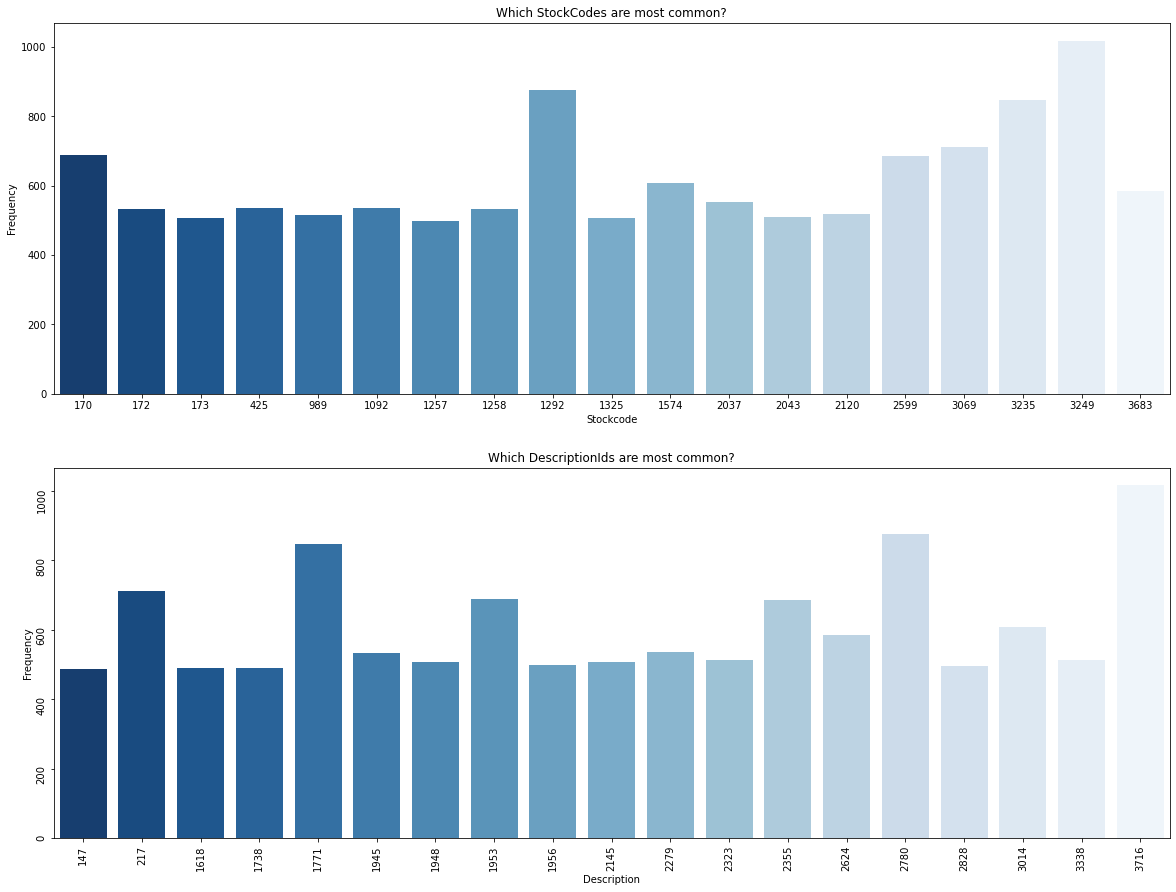

In [9]:
stockcode_frequency = df.StockCode.value_counts().sort_values(ascending=False)
description_frequency = df.DescriptionId.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(2,1,figsize=(20,15))

sns.barplot(stockcode_frequency.iloc[0:19].index,
            stockcode_frequency.iloc[0:19].values,
            ax = ax[0], palette="Blues_r")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which StockCodes are most common?");

sns.barplot(description_frequency.iloc[0:19].index,
            description_frequency.iloc[0:19].values,
            ax = ax[1], palette="Blues_r")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Description")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Which DescriptionIds are most common?");

We can see that our top 20 most frequent stockcodes and descriptions generally match up with eachother in terms of level of frequency so we can say it is true that majority of the descriptions are consistent with the stockcodes except for some exceptions causing slight differences in the amount of stockcodes vs descriptions

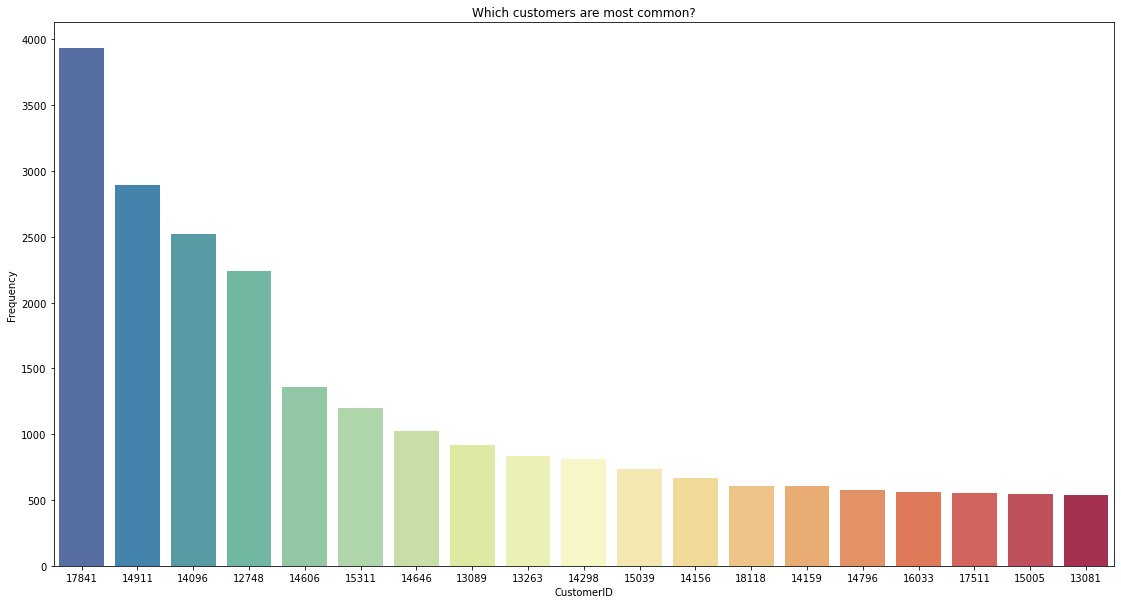

In [10]:
customer_frequency = df.CustomerId.value_counts().sort_values(ascending=False).iloc[0:19] 

plt.figure(figsize=(19,10))
customer_frequency.index = customer_frequency.index.astype('int64') 

sns.barplot(customer_frequency.index, customer_frequency.values, order=customer_frequency.index, palette="Spectral_r")
plt.ylabel("Frequency")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

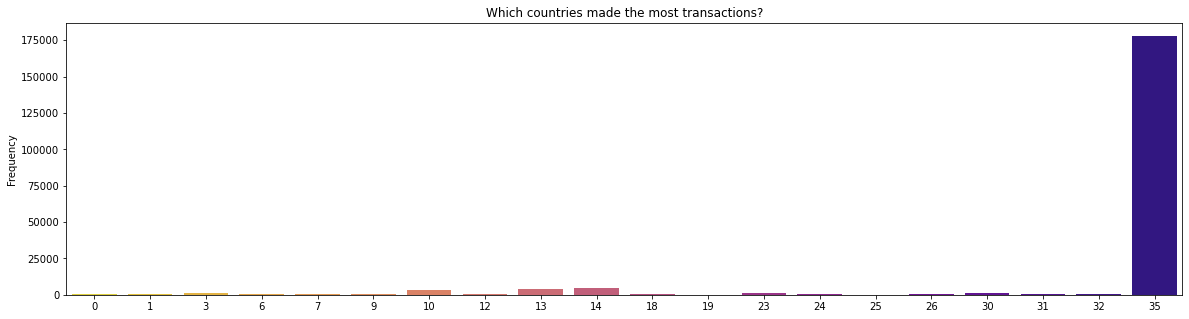

In [11]:
country_frequency = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))

sns.barplot(country_frequency.index , country_frequency, palette="plasma_r")
plt.ylabel("Frequency")
plt.title("Which countries made the most transactions?");
plt.xticks()

It is clear that the vast majority of transactions take place in the Country35. Lets see if our top 20 Customers purchase their items in the Country35 or in other countries.

In [12]:
x = df.groupby(['CustomerId','Country']).size().sort_values(ascending=False).iloc[0:19]
pd.DataFrame(x)

,,0
CustomerId,Country,
17841,35,3934
14911,10,2897
14096,35,2518
12748,35,2242
14606,35,1362
15311,35,1202
14646,23,1026
13089,35,920
13263,35,837


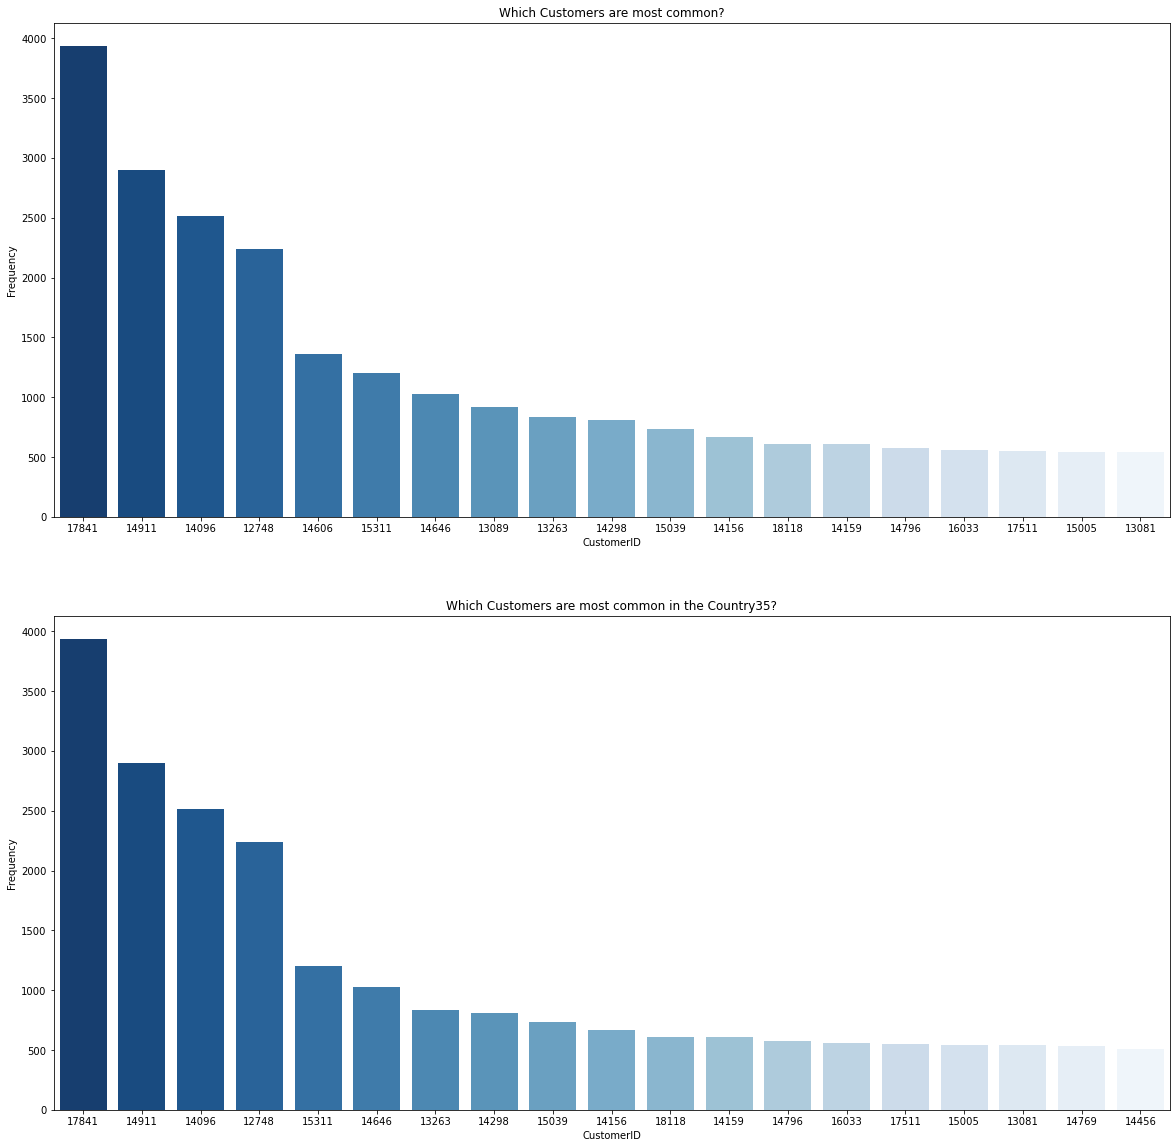

In [13]:
customer_frequency = df.CustomerId.value_counts().sort_values(ascending=False).iloc[0:19] 
c35_customers = df.groupby(df['CustomerId']).size().where(df['Country'] == 35).sort_values(ascending=False).iloc[0:19]

fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.barplot(customer_frequency.index,
            customer_frequency,
            ax = ax[0], palette="Blues_r", order=customer_frequency.index)
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("CustomerID")
ax[0].set_title("Which Customers are most common?");

sns.barplot(c35_customers.index,
            c35_customers,
            ax = ax[1], palette="Blues_r", order=c35_customers.index)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("CustomerID")
ax[1].set_title("Which Customers are most common in the Country35?");

In [14]:
df.UnitPrice.describe()

count    200000.000000
mean          3.454349
std          90.082500
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [15]:
df = df.loc[df.UnitPrice > 0].copy()

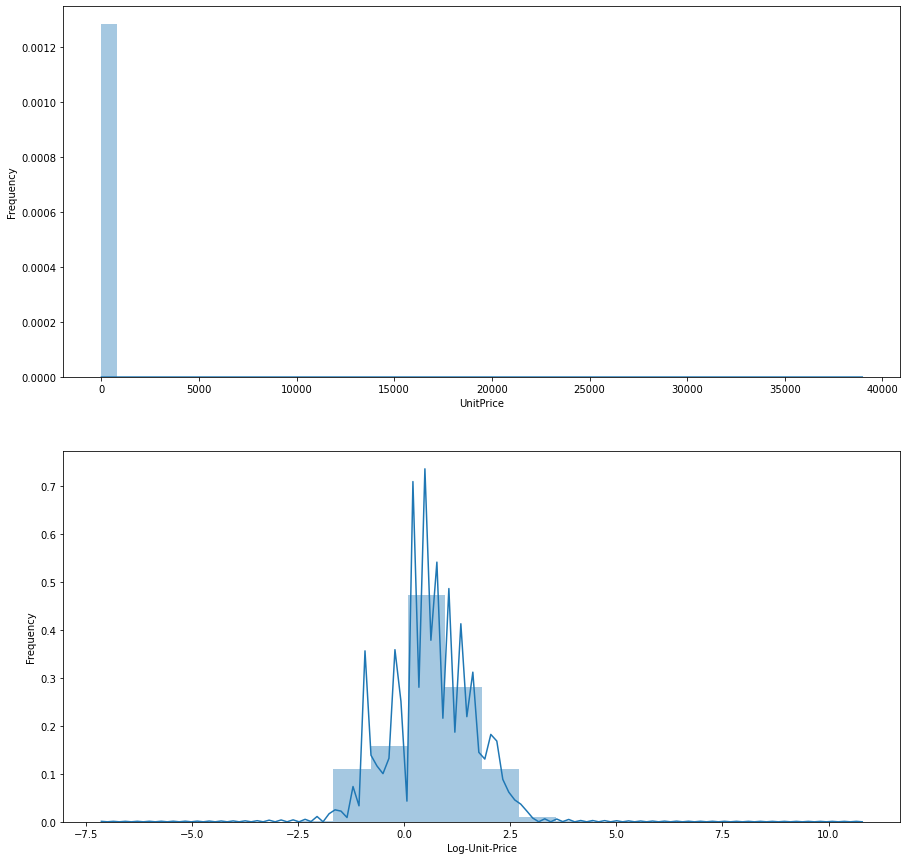

In [16]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

sns.distplot(df.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(df.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

From the graphs we can see that a large portion of the prices are quite small and we have a few outliers that are very large. Due to the high frequency of small transactions I will focus on the transactions with prices in the log-unit-price graph. To find the prices i will take the exponent of -2 and the exponent of 3 as the majority of the price are between these two log units.

In [17]:
np.exp(-2),np.exp(3)

(0.1353352832366127, 20.085536923187668)

We can see that the majority of our distribution lies between 0.1 and 20.1 so I will delete all outliers outside of this range

In [18]:
df = df.loc[(df.UnitPrice > 0.1) & (df.UnitPrice < 20)].copy()

In [19]:
df.UnitPrice.describe()

count    199165.000000
mean          2.829862
std           2.804937
min           0.110000
25%           1.250000
50%           1.950000
75%           3.750000
max          19.960000
Name: UnitPrice, dtype: float64

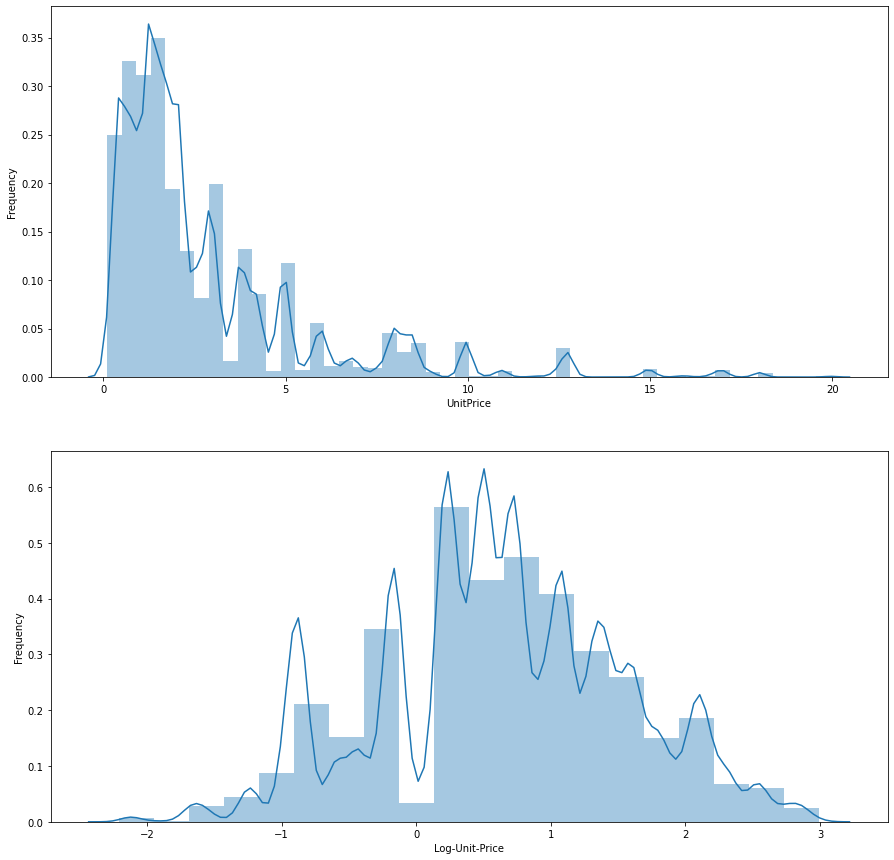

In [20]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

sns.distplot(df.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(df.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

Now are std is much smaller and we have a more evenly distributed graph. Our graph is still skewed to the right which is something to make note of . Now lets take a look at the Quantity column.

In [21]:
df.Quantity.describe()

count    199165.000000
mean         11.885135
std         249.533491
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       74215.000000
Name: Quantity, dtype: float64

In [22]:
df = df.loc[(df.Quantity > 0)].copy()

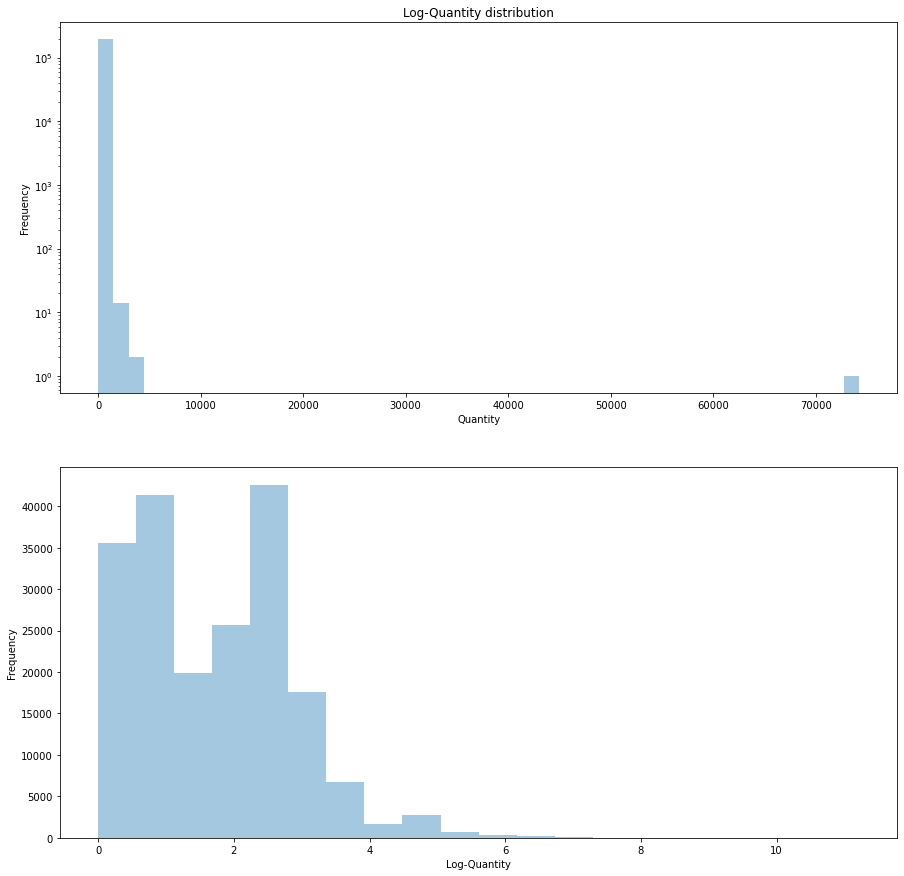

In [23]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

sns.distplot(df.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")

sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

From the graphs it looks like we have a small amount of outliers greater than 70000. lets take the exponent where Log-Quantity=4 as most of our distribution lies within this region

In [24]:
np.exp(4),np.quantile(df.Quantity, 0.95)

(54.598150033144236, 36.0)

It looks like we will be able to keep more than 95% of our data with a max quantity set at 55. Lets take a look at our distribution after we drop the outliers

In [25]:
df = df.loc[df.Quantity < 55].copy()

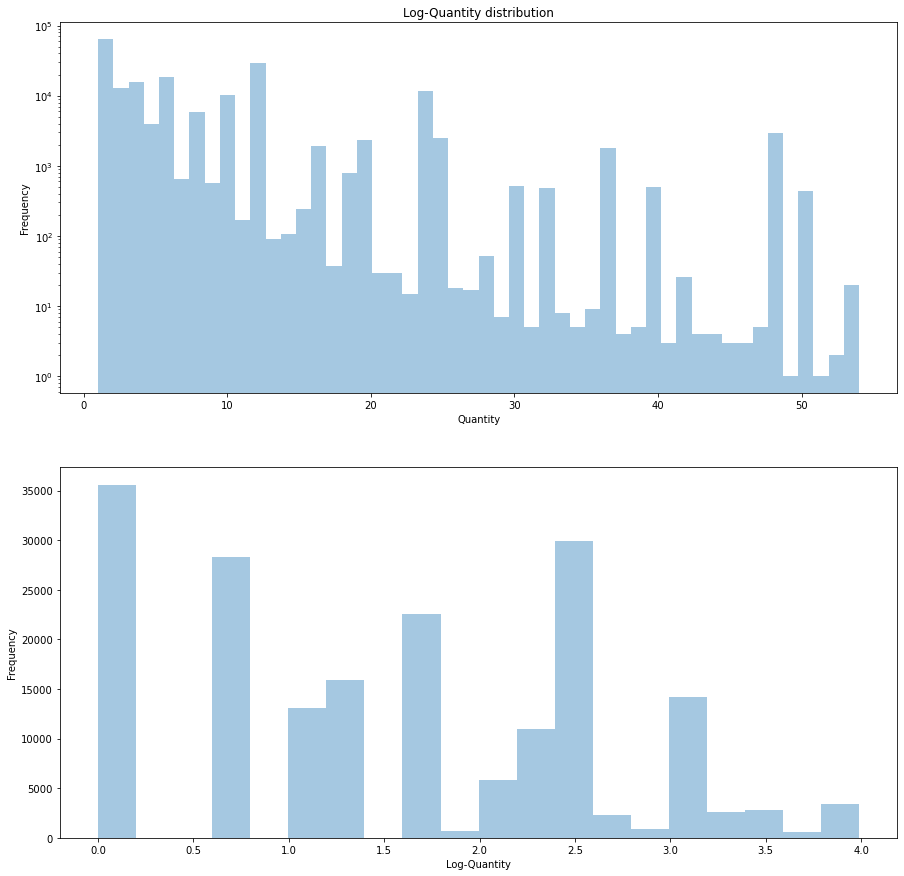

In [26]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

sns.distplot(df.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")

sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

Which months had the highest Revenue?

In [27]:
df["Revenue"] = df.Quantity * df.UnitPrice

df["Month"] = df.InvoiceDate.dt.month

df.groupby('Month').sum().sort_values(by='Revenue', ascending=False)

,InvoiceNo,StockCode,DescriptionId,Quantity,UnitPrice,CustomerId,Country,Revenue
Month,,,,,,,,
11,509831668,50935841,63956681,233600,83491.40,476212420,1031347,436877.39
10,332564937,39101091,47993831,183640,66840.21,358995408,772127,346349.49
9,233903580,30961337,38503061,175017,52598.81,289543253,624811,322921.46
12,159570719,31977290,41085572,163576,58860.34,321177808,692575,321900.67
5,90039305,20813294,27631923,118184,41503.05,206736600,446261,238821.95
8,137068760,20035551,26063301,118090,35263.78,194238439,411115,211425.11
6,103848034,19825506,26364609,108211,37857.07,196682004,417390,205981.20
3,52282385,19081027,25343795,105525,37838.35,196740112,423687,203981.57
7,121456645,20079242,26440904,115393,34502.81,196426987,419935,202359.47


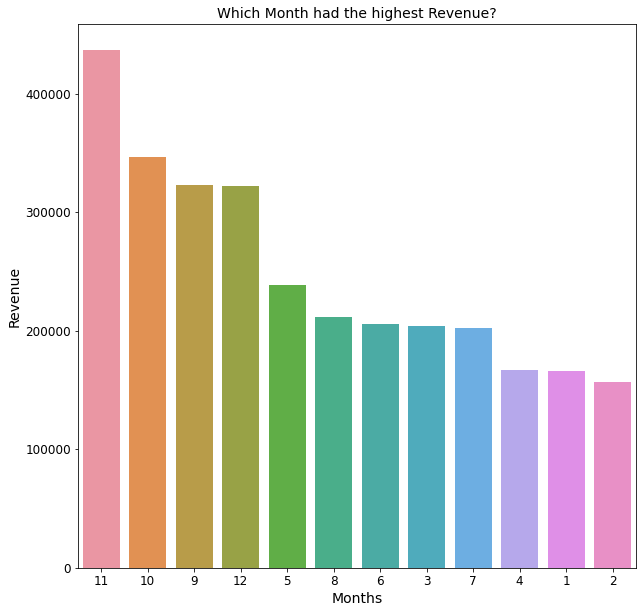

In [28]:
plt.rcParams.update({'font.size': 12})

z = df.groupby('Month').sum().sort_values(by='Revenue',ascending=False)
x = z.index
y = z['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,10))

sns.barplot(x, y, order=x)
plt.ylabel("Revenue", Size=14)
plt.xlabel("Months", Size=14)
plt.title("Which Month had the highest Revenue?", Size=14);

We can see that November is the highest revenue month for the company followed by October and then September. This could be because these are the months leading up to the holiday months where it is more likely people will be buying gifts and business increasing their inventory. It should be noted that the company considers many of their customers to be wholesalers indicating that customers are likely preparing for the holiday season by purchasing more products.

What product contributed the most to revenue? Why?

In [29]:
df1 = df[['StockCode','Revenue']].groupby('StockCode').sum().sort_values(by='Revenue', ascending=False).iloc[0:9]

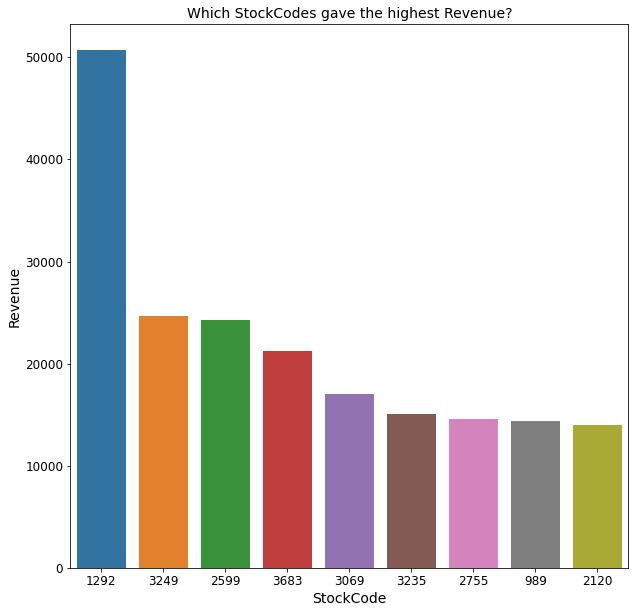

In [30]:
z = df1.groupby('StockCode').sum().sort_values(by='Revenue',ascending=False)
x = z.index
y = z['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,10))

sns.barplot(x, y, order=x)
plt.ylabel("Revenue", Size=14)
plt.xlabel("StockCode", Size=14)
plt.title("Which StockCodes gave the highest Revenue?", Size=14);

We can see that StockCode 1292 contributed the most to revenue by over $50000. Lets take a look at a sample of the transactions for StockCode 1292 to see if there are any clues that can explain why it's contribution to revenue is so high --it's high contribution to revenue would be the relatively high UnitPrice compared to the rest of the products. This allows it to generate more revenue in lower quantities being sold. 
The other data features seem to be relatively random and so without further information we can make any more inferences.

In [31]:
df

,InvoiceNo,StockCode,DescriptionId,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,Revenue,Month
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056,35,11.25,5
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098,35,11.70,5
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044,35,23.80,11
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525,35,0.83,11
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952,35,19.80,5
...,...,...,...,...,...,...,...,...,...,...
199994,10369,1347,383,24,2011-08-05 11:49:00,1.25,13435,35,30.00,8
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397,3,12.48,7
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295,35,7.50,11
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311,35,0.85,3


### Various Insights found are:

1. We have 3544 unique StockCodes and 3731 unique DescriptionIds which aligns with the fact that the retailer sells many different types of products.
2. We can see that our top 20 most frequent stockcodes and descriptions generally match up with eachother in terms of level of frequency so we can say it is true that majority of the descriptions are consistent with the stockcodes except for some exceptions causing slight differences in the amount of stockcodes vs descriptions
3. It is clear that the vast majority of transactions take place in the Country35. Lets see if our top 20 Customers purchase their items in the Country35 or in other countries.
4. It looks like we will be able to keep more than 95% of our data with a max quantity set at 55. 
5. We can see that November is the highest revenue month for the company followed by October and then September. This could be because these are the months leading up to the holiday months where it is more likely people will be buying gifts and business increasing their inventory. It should be noted that the company considers many of their customers to be wholesalers indicating that customers are likely preparing for the holiday season by purchasing more products.
6. We can see that StockCode 1292 contributed the most to revenue by over $50000. 
Lets take a look at a sample of the transactions for StockCode 1292 to see if there are any clues that can explain why it's contribution to revenue is so high --it's high contribution to revenue would be the relatively high UnitPrice compared to the rest of the products. This allows it to generate more revenue in lower quantities being sold. The other data features seem to be relatively random and so without further information we can make any more inferences.